In [1]:
#import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
#loading the dataset
data=pd.read_csv(r"C:\Users\Dhanu\OneDrive\Desktop\Covid_19_cases4.csv")
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  2730 non-null   object
 1   day                      2730 non-null   int64 
 2   month                    2730 non-null   int64 
 3   year                     2730 non-null   int64 
 4   cases                    2730 non-null   int64 
 5   deaths                   2730 non-null   int64 
 6   countriesAndTerritories  2730 non-null   object
dtypes: int64(5), object(2)
memory usage: 149.4+ KB


In [4]:
data.describe()

,day,month,year,cases,deaths
count,2730.000000,2730.000000,2730.0,2730.000000,2730.000000
mean,16.000000,4.010989,2021.0,3661.010989,65.291941
std,8.765919,0.818813,0.0,6490.510073,113.956634
min,1.000000,3.000000,2021.0,-2001.000000,-3.000000
25%,8.000000,3.000000,2021.0,361.250000,2.000000
50%,16.000000,4.000000,2021.0,926.500000,14.500000
75%,24.000000,5.000000,2021.0,3916.250000,72.000000
max,31.000000,5.000000,2021.0,53843.000000,956.000000


In [5]:
data.dtypes

dateRep                    object
day                         int64
month                       int64
year                        int64
cases                       int64
deaths                      int64
countriesAndTerritories    object
dtype: object

In [6]:
data.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
dtype: int64

In [7]:
#convert the date to datetime
data['dateRep'] = pd.to_datetime(data['dateRep'])
data.dtypes


C:\Users\Dhanu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-05-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Dhanu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-05-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Dhanu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-05-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Dhanu\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-05-2021' in DD/MM/YYYY format. Provide format or specif

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
dtype: object

In [8]:
# Calculate mean and median total vaccinations
mean_deaths = data['deaths'].mean()
median_deaths = data['deaths'].median()

# Calculate the correlation between total vaccinations and people fully vaccinated
correlation = data['deaths'].corr(data['cases'])

# Display the results
print(f"Mean deaths: {mean_deaths:.2f}")
print(f"Median deaths: {median_deaths:.2f}")
print(f"Correlation (deaths vs. cases): {correlation:.2f}")

Mean deaths: 65.29
Median deaths: 14.50
Correlation (deaths vs. cases): 0.77


In [9]:
#EDA

data.countriesAndTerritories.value_counts()

Austria          91
Belgium          91
Spain            91
Slovenia         91
Slovakia         91
Romania          91
Portugal         91
Poland           91
Norway           91
Netherlands      91
Malta            91
Luxembourg       91
Lithuania        91
Liechtenstein    91
Latvia           91
Italy            91
Ireland          91
Iceland          91
Hungary          91
Greece           91
Germany          91
France           91
Finland          91
Estonia          91
Denmark          91
Czechia          91
Cyprus           91
Croatia          91
Bulgaria         91
Sweden           91
Name: countriesAndTerritories, dtype: int64

In [10]:
data["deaths"]= data.groupby("countriesAndTerritories").deaths.tail(1)
#countriesAndTerritories with deaths
data.groupby("countriesAndTerritories")["deaths"].mean().sort_values(ascending= False).head(20)

countriesAndTerritories
France         375.0
Germany        358.0
Italy          246.0
Czechia        232.0
Spain          192.0
Hungary        130.0
Bulgaria       117.0
Slovakia        81.0
Romania         53.0
Portugal        34.0
Greece          30.0
Belgium         25.0
Austria         25.0
Poland          24.0
Netherlands     21.0
Sweden          19.0
Croatia         11.0
Lithuania        9.0
Denmark          4.0
Latvia           3.0
Name: deaths, dtype: float64

C:\Users\Dhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


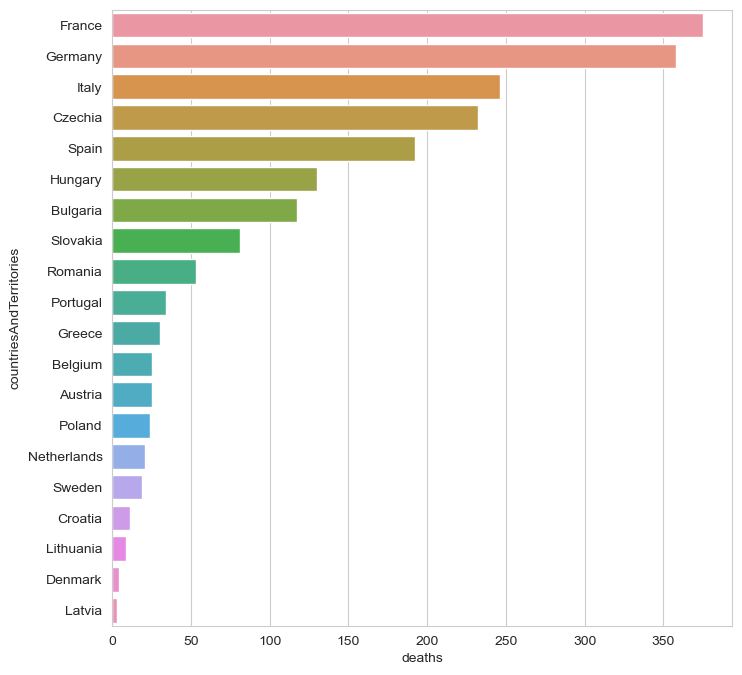

In [11]:
#barplot visualization of countriesAndTerritories with deaths
x= data.groupby("countriesAndTerritories")["deaths"].mean().sort_values(ascending= False).head(20)
sns.set_style("whitegrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("deaths")
plt.show()


In [12]:
#Top countriesAndTerritories with cases
data["cases"]= data.groupby("countriesAndTerritories").cases.tail(1)

data.groupby("countriesAndTerritories")["cases"].mean().sort_values(ascending= False).head(20)

countriesAndTerritories
France         27422.0
Italy          13106.0
Czechia        12191.0
Sweden          6191.0
Slovakia        5260.0
Poland          4786.0
Spain           4517.0
Germany         3943.0
Netherlands     3753.0
Belgium         2775.0
Hungary         2764.0
Bulgaria        2588.0
Romania         2096.0
Lithuania       2055.0
Greece          1170.0
Austria         1148.0
Estonia         1111.0
Norway           968.0
Ireland          681.0
Denmark          497.0
Name: cases, dtype: float64

C:\Users\Dhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


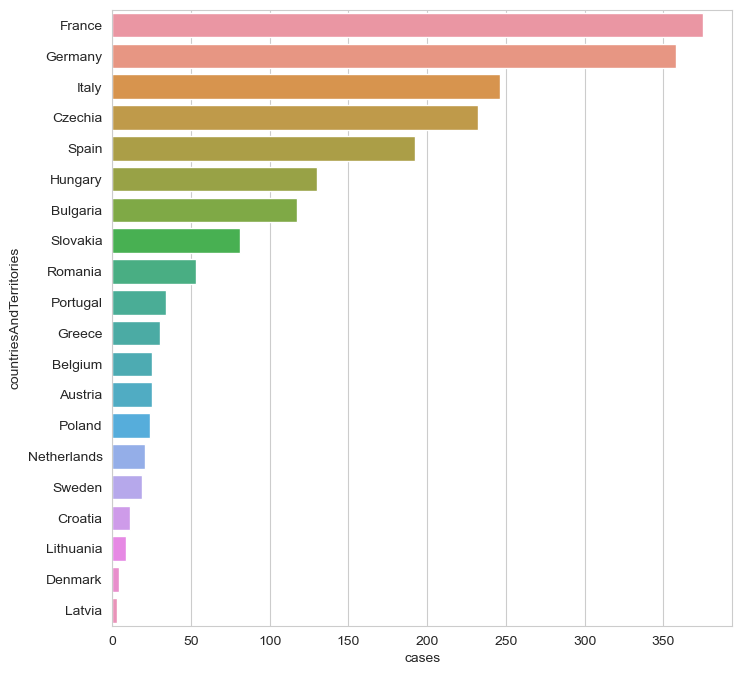

In [13]:
#barplot visualization of countriesAndTerritories with cases

sns.set_style("whitegrid")
plt.figure(figsize= (8,8))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("cases")
plt.show()


C:\Users\Dhanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


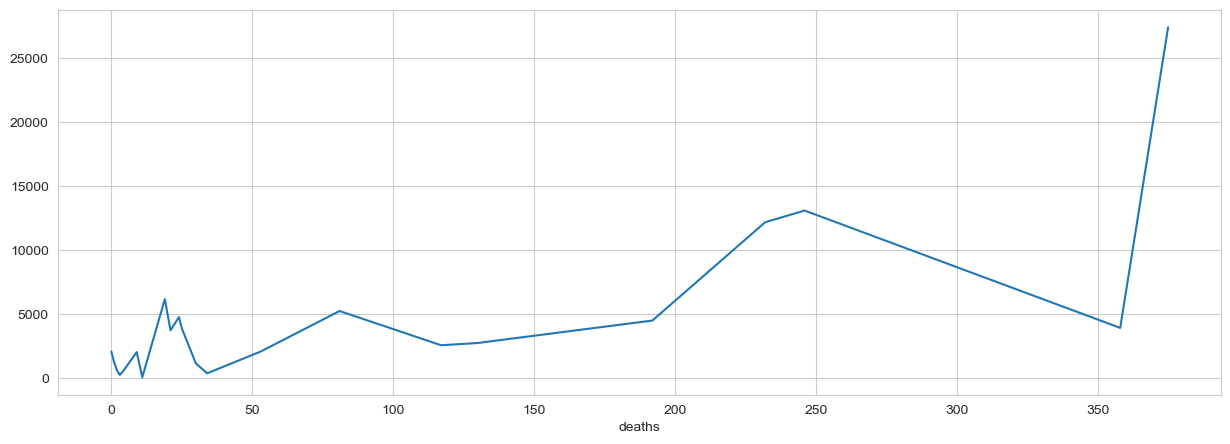

In [16]:
#daily cases
x= data.groupby("deaths").cases.sum()
plt.figure(figsize= (15,5))
sns.lineplot(x.index,x.values)
plt.show()


In [17]:
#COMPARING TOP 5 countriesAndTerritories WITH DEATHS
data.groupby("countriesAndTerritories")["deaths"].mean().sort_values(ascending= False).head()

countriesAndTerritories
France     375.0
Germany    358.0
Italy      246.0
Czechia    232.0
Spain      192.0
Name: deaths, dtype: float64

In [18]:
#creating dataframe for top 5 vaccinated countries
x= data.loc[(data.countriesAndTerritories== "France") | (data.countriesAndTerritories== "Germany")| 
            (data.countriesAndTerritories== "Italy")| (data.countriesAndTerritories== "Czechia")|
            (data.countriesAndTerritories== "Spain")]

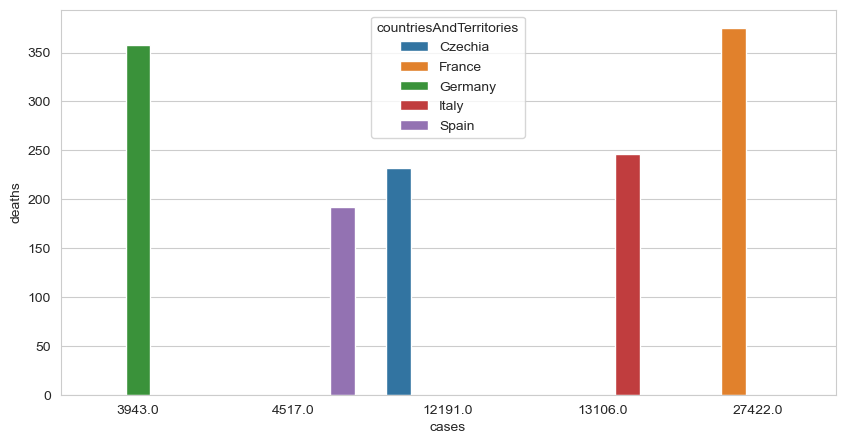

In [19]:
#total deaths comparison
plt.figure(figsize= (10,5))
sns.barplot(x= "cases",y= "deaths" ,data= x,hue= "countriesAndTerritories")
plt.show()
